In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf
import re

In [2]:
ipl = pd.read_csv('C:\\Users\\ACER\\Downloads\\ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
 df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [4]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


In [5]:
X = df.drop(['total'], axis =1)
Y = df['total']

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [12]:
model = keras.Sequential([
    keras.layers.Input( shape = (X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(216, activation = 'relu'),
    keras.layers.Dense(1, activation = 'linear')
])

huber_loss = tf.keras.losses.Huber(delta =1.0)
model.compile(optimizer = 'adam', loss = huber_loss)

In [13]:
model.fit(X_train_scaled, Y_train, epochs = 70, batch_size = 64, validation_data = (X_test_scaled, Y_test))

Epoch 1/70
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 56.0930 - val_loss: 22.2678
Epoch 2/70
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.4287 - val_loss: 22.0914
Epoch 3/70
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.3739 - val_loss: 21.8967
Epoch 4/70
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.3376 - val_loss: 21.7776
Epoch 5/70
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.0958 - val_loss: 21.8653
Epoch 6/70
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 21.7916 - val_loss: 21.6336
Epoch 7/70
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 21.8369 - val_loss: 21.9506
Epoch 8/70
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.9032 - val_loss: 21.5733
Epoch 9/70
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.8247 - val_loss: 21.5293
Epoch 10/70
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 21.6097 - val_loss: 21.5390
Epoch 11/70
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 21.6863 - val_loss: 21.4271
Epoch 12/70
832/832 ━━━━━━━━━━

<Axes: >

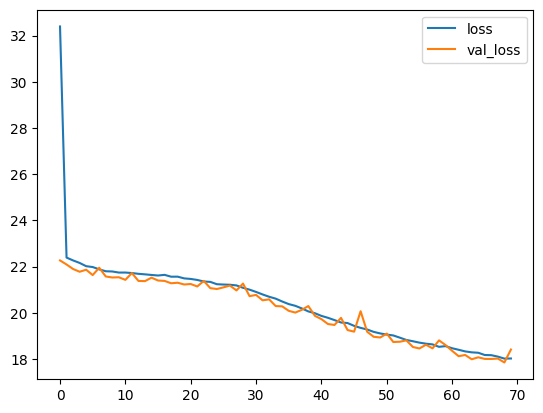

In [14]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [16]:
predictions = model.predict(X_test_scaled)
mean_absolute_error(Y_test,predictions)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step


18.883841375289478

In [17]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings

In [18]:
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options = df['venue'].unique().tolist(), description = "Select Venue:")
batting_team = widgets.Dropdown(options = df['bat_team'].unique().tolist(), description = "Select Batting Team")
bowling_team = widgets.Dropdown(options = df['bowl_team'].unique().tolist(), description = "Select Bowling Team")
striker = widgets.Dropdown(options = df['batsman'].unique().tolist(), description = "Select Striker")
bowler = widgets.Dropdown(options = df['bowler'].unique().tolist(), description = "Select Bowler")

predict_button = widgets.Button(description = "Predict Score")

def predict_score(b):
    with output:
        clear_output()

        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team, decoded_striker, decoded_bowler])
        input = input.reshape(1, 5)
        input = scaler.transform(input)

        predicted_score = model.predict(input)
        predicted_score =int(predicted_score[0, 0])

        print(predicted_score)

In [19]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajastha…

Dropdown(description='Select Bowling Team', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi …

Dropdown(description='Select Striker', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moham…

Dropdown(description='Select Bowler', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL …

Button(description='Predict Score', style=ButtonStyle())

Output()